### Imports and Helper Functions 

In [14]:
import numpy as np
from pymoo.factory import get_algorithm
from pymoo.model.problem import Problem
from pymoo.model.repair import Repair
from pymoo.optimize import minimize
from pymoo.util.misc import cdist
from pymoo.util.reference_direction import UniformReferenceDirectionFactory, MultiLayerReferenceDirectionFactory
from pymoo.visualization.pcp import pcp

In [15]:
# return the references lines given scaling parameters
def get_ref_lines(x):
    ref_dirs = MultiLayerReferenceDirectionFactory(
        UniformReferenceDirectionFactory(6, n_partitions=1, scaling=1.0),
        UniformReferenceDirectionFactory(6, n_partitions=1, scaling=x[0]),
        UniformReferenceDirectionFactory(6, n_partitions=1, scaling=x[1]),
        UniformReferenceDirectionFactory(6, n_partitions=1, scaling=x[2]),
    ).do()

    ref_dirs = np.row_stack([ref_dirs, np.ones(6) / 6])
    return ref_dirs



# calculate the distance between all reference directions and take closest
def calc_dist_closest(ref_dirs):
    D = cdist(ref_dirs, ref_dirs)
    np.fill_diagonal(D, np.inf)
    return np.min(D)

### Formulate an Optimization Problem

In [16]:
class ScalingProblem(Problem):
    def __init__(self):
        super().__init__(n_var=3, n_obj=1, n_constr=0, xl=0, xu=1, type_var=np.double, elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
        ref_dirs = get_ref_lines(x)
        out["F"] = -calc_dist_closest(ref_dirs)


Formulate a repair which sorts the values largest to smallest for each individual

In [17]:
class OrderingRepair(Repair):

    def _do(self, problem, pop, **kwargs):
        X = pop.get("X")
        X = np.row_stack([np.sort(x)[::-1] for x in X])
        pop.set("X", X)
        return pop

### Solve the Optimization Problem

In [18]:
method = get_algorithm("ga",
                       pop_size=100,
                       repair=OrderingRepair(),
                       elimate_duplicates=True)

res = minimize(ScalingProblem(),
               method,
               termination=('n_gen', 20),
               verbose=False)

scalings = res.X
ref_dirs = get_ref_lines(scalings)
obj = calc_dist_closest(ref_dirs)

print("Scalings:", scalings)
print("Closest Distance:", obj)

Scalings: [0.75124818 0.50673229 0.25523888]
Closest Distance: 0.22321144241553223


The optimum seems to be [0.75, 0.5, 0.25]

In [19]:
scalings = np.array([0.75, 0.5, 0.25])
ref_dirs = get_ref_lines(scalings)
obj = calc_dist_closest(ref_dirs)

print("Scalings:", scalings)
print("Closest Distance:", obj)
print("YES")


Scalings: [0.75 0.5  0.25]
Closest Distance: 0.22821773229381914
YES


Das-Dennis
25
[[0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.042 0.042 0.042 0.042 0.042 0.792]
 [0.042 0.042 0.042 0.042 0.792 0.042]
 [0.042 0.042 0.042 0.792 0.042 0.042]
 [0.042 0.042 0.792 0.042 0.042 0.042]
 [0.042 0.792 0.042 0.042 0.042 0.042]
 [0.792 0.042 0.042 0.042 0.042 0.042]
 [0.083 0.083 0.083 0.083 0.083 0.583]
 [0.083 0.083 0.083 0.083 0.583 0.083]
 [0.083 0.083 0.083 0.583 0.083 0.083]
 [0.083 0.083 0.583 0.083 0.083 0.083]
 [0.083 0.583 0.083 0.083 0.083 0.083]
 [0.583 0.083 0.083 0.083 0.083 0.083]
 [0.125 0.125 0.125 0.125 0.125 0.375]
 [0.125 0.125 0.125 0.125 0.375 0.125]
 [0.125 0.125 0.125 0.375 0.125 0.125]
 [0.125 0.125 0.375 0.125 0.125 0.125]
 [0.125 0.375 0.125 0.125 0.125 0.125]
 [0.375 0.125 0.125 0.125 0.125 0.125]
 [0.167 0.167 0.167 0.167 0.167 0.167]]


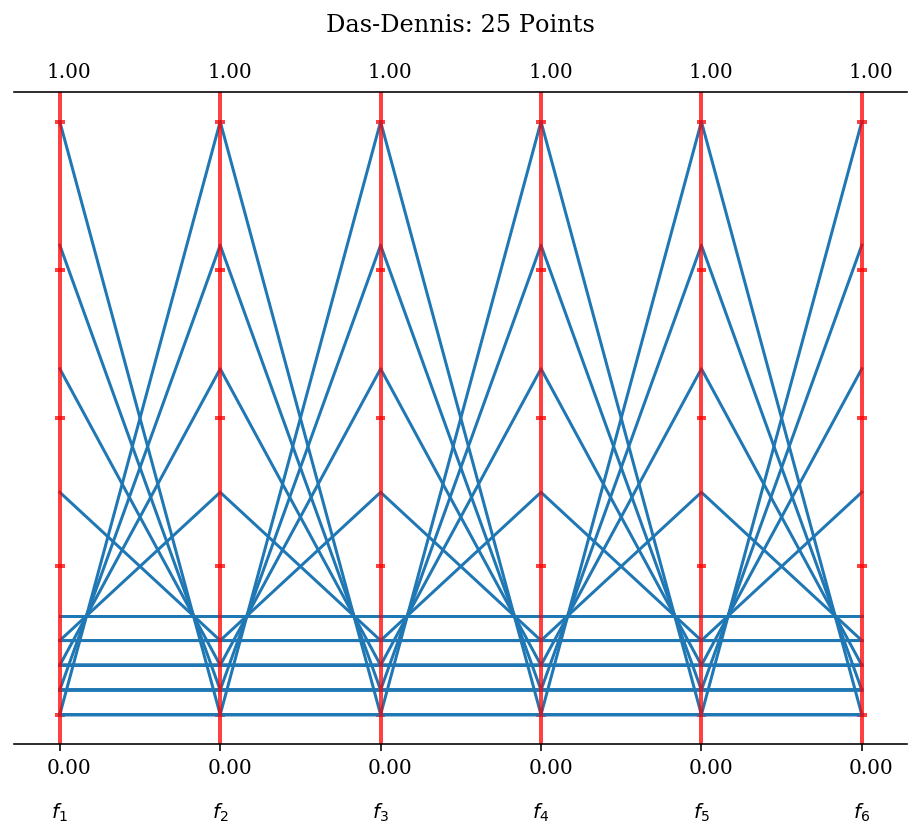

In [20]:
print("Das-Dennis")
print(len(ref_dirs))
print(ref_dirs.round(3))
pcp(title=("Das-Dennis: 25 Points", {'pad' : 30})).add(ref_dirs).show()
np.savetxt("das_dennis_25.csv", ref_dirs, delimiter=",")

Reduction Based Method
Closest Distance: 0.3065106629143467
25
[[1.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]
 [0.143 0.173 0.127 0.13  0.25  0.178]
 [0.006 0.007 0.    0.    0.52  0.467]
 [0.006 0.012 0.54  0.    0.    0.443]
 [0.514 0.    0.    0.003 0.    0.483]
 [0.    0.    0.    0.54  0.459 0.   ]
 [0.511 0.    0.    0.    0.489 0.   ]
 [0.    0.519 0.019 0.    0.    0.462]
 [0.016 0.    0.    0.568 0.01  0.406]
 [0.009 0.    0.591 0.    0.4   0.   ]
 [0.515 0.    0.    0.482 0.003 0.   ]
 [0.005 0.488 0.    0.501 0.006 0.   ]
 [0.372 0.598 0.    0.026 0.    0.004]
 [0.    0.517 0.    0.    0.483 0.   ]
 [0.508 0.    0.491 0.    0.    0.   ]
 [0.012 0.    0.473 0.51  0.005 0.   ]
 [0.005 0.459 0.525 0.011 0.    0.   ]
 [0.007 0.028 0.198 0.019 0.749 0.   ]
 [0.696 0.281 0.    0.009 0.014 0.   ]
 

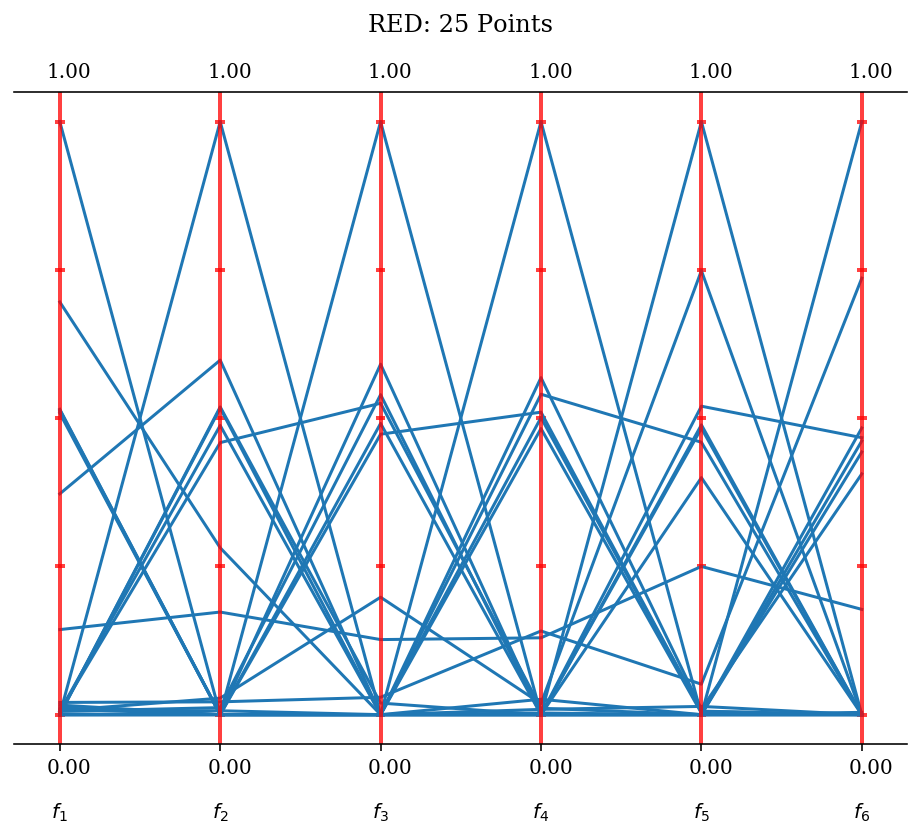

In [21]:
from pymoo.util.reference_direction import SamplingReferenceDirectionFactory

ref_dirs = SamplingReferenceDirectionFactory(n_dim=6, n_sample_points=15000, n_points=25).do()
obj = calc_dist_closest(ref_dirs)

print("Reduction Based Method")
print("Closest Distance:", obj)
print(len(ref_dirs))
print(ref_dirs.round(3))

pcp(title=("RED: 25 Points", {'pad' : 30})).add(ref_dirs).show()
np.savetxt("red_25.csv", ref_dirs, delimiter=",")
